In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import string
import math
from nltk.stem import PorterStemmer
from glob import glob
from collections import defaultdict
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
emails = pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
emails.dropna(how="any", inplace=True, axis=1)
emails.columns = ['label', 'message']
emails.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
emails.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

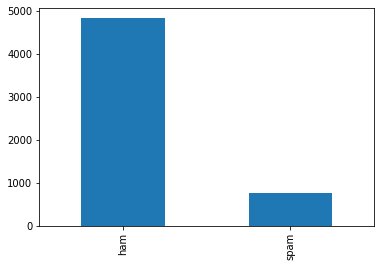

In [5]:
emails.label.value_counts().plot.bar()

In [6]:
emails['spam'] = emails.label.map({'ham':0, 'spam':1})
emails.head()

,label,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
emails['length'] = emails['message'].apply(len)

(-40, 950)

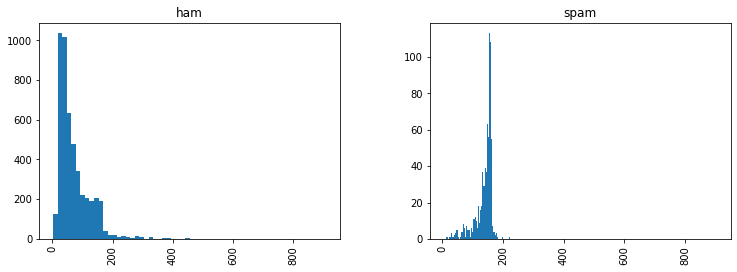

In [8]:
emails.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950)

In [9]:
emails[emails.label=='ham'].describe()


,spam,length
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [10]:
emails[emails.label=='spam'].describe()


,spam,length
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [11]:

def text_process(msg):
    STOPWORDS = stopwords.words('english')
    ps = PorterStemmer()
    nopunc = [char for char in msg if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    af_st = [word for word in nopunc.split() if word.lower() not in STOPWORDS]
    hash = set()
    for w in af_st:
        hash.add(ps.stem(w))
    return ' '.join(list(hash))

In [12]:
emails['clean_msg'] = emails.message.apply(text_process)

In [13]:
emails.head()

,label,message,spam,length,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,la e got world amor avail cine bugi wat Go buf...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok wif lar oni joke u
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,receiv wkli questionstd 87121 entri win may FA...
3,ham,U dun say so early hor... U c already then say...,0,49,earli say U hor alreadi c dun
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,think live though goe around usf dont nah


In [14]:
X_train = emails.clean_msg
y_train = emails.spam

In [15]:

vect = CountVectorizer(binary = True)
X_train_mat = vect.fit_transform(X_train)

In [16]:
df = pd.DataFrame(X_train_mat.toarray())
df.columns = vect.get_feature_names()
df['is_spam'] = list(y_train.array)
df.head()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,ìïll,ûthank,ûªm,ûªt,ûªv,ûï,ûïharri,ûò,ûówel,is_spam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
sudo_sp = list(np.ones(len(vect.get_feature_names())+1))
sudo_nsp = list(np.ones(len(vect.get_feature_names())))
sudo_nsp.append(0)
df.loc[len(df.index)] = sudo_sp
df.loc[len(df.index)] = sudo_nsp
df.tail()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,ìïll,ûthank,ûªm,ûªt,ûªv,ûï,ûïharri,ûò,ûówel,is_spam
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5572,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5573,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [18]:
summary_spam = df[df.is_spam == 1].describe()
summary_spam

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,ìïll,ûthank,ûªm,ûªt,ûªv,ûï,ûïharri,ûò,ûówel,is_spam
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,...,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.0
mean,0.004011,0.002674,0.002674,0.002674,0.004011,0.001337,0.002674,0.006684,0.004011,0.002674,...,0.001337,0.001337,0.001337,0.001337,0.002674,0.002674,0.002674,0.001337,0.001337,1.0
std,0.063245,0.051674,0.051674,0.051674,0.063245,0.036564,0.051674,0.081540,0.063245,0.051674,...,0.036564,0.036564,0.036564,0.036564,0.051674,0.051674,0.051674,0.036564,0.036564,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [19]:
spam_means = summary_spam.loc['mean']

In [20]:
summary_non_spam = df[df.is_spam == 0].describe()
summary_non_spam

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,ìïll,ûthank,ûªm,ûªt,ûªv,ûï,ûïharri,ûò,ûówel,is_spam
count,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,...,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.0
mean,0.000207,0.000207,0.000207,0.000207,0.000207,0.000414,0.000207,0.000207,0.000207,0.000207,...,0.000414,0.000414,0.000414,0.000414,0.000207,0.000207,0.000207,0.001450,0.000414,0.0
std,0.014395,0.014395,0.014395,0.014395,0.014395,0.020355,0.014395,0.014395,0.014395,0.014395,...,0.020355,0.020355,0.020355,0.020355,0.014395,0.014395,0.014395,0.038061,0.020355,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [21]:
non_spam_means = summary_non_spam.loc['mean']

In [22]:
corpus = vect.get_feature_names()
prob_of_spam = sum(y_train.array)/len(y_train.array)
prob_of_non_spam = 1-prob_of_spam

In [23]:
file_name = glob("test/email*.txt")
frames = [pd.read_csv(file,sep = '\n',header = None)[0].str.cat() for file in file_name]
data_frames = pd.concat([pd.DataFrame([frame],columns = ['msg']) for frame in frames])
data_frames.set_index([pd.Index(np.arange(len(frames)))])

,msg
0,{\rtf1\ansi\ansicpg1252\cocoartf1404\cocoasubr...
1,{\rtf1\ansi\ansicpg1252\cocoartf1404\cocoasubr...


In [24]:
data_frames['clean_msg'] = data_frames['msg'].apply(text_process)
X_test = data_frames.clean_msg

In [25]:

def word_set(msg):
    hash = set()
    hash = set(msg.strip().split())
    return hash

In [26]:
def find_probability(hash,corpus,spam_means,non_spam_means):
    X_given_spam = X_given_non_spam = 1
    for word in corpus:
        if word in hash:
            X_given_spam*=spam_means[word]
            X_given_non_spam*=non_spam_means[word]
        else:
            X_given_spam*=(1-spam_means[word])
            X_given_non_spam*=(1-non_spam_means[word])
    return (X_given_spam,X_given_non_spam)

In [27]:
def Bernoulli_naive_bays(X_test,corpus,spam_means,non_spam_means,prob_of_spam,prob_of_non_spam):
    predicts = []
    for msg in X_test.array:
        hash = word_set(msg)
        X_given_spam,X_given_non_spam = find_probability(hash,corpus,spam_means,non_spam_means)
        prob_spam_given_X = (X_given_spam*prob_of_spam)/((X_given_spam*prob_of_spam)+(X_given_non_spam*prob_of_non_spam))
        prob_non_spam_given_X = (X_given_non_spam*prob_of_non_spam)/((X_given_spam*prob_of_spam)+(X_given_non_spam*prob_of_non_spam))
        if prob_spam_given_X > prob_non_spam_given_X:
            predicts.append(1)
        else:
            predicts.append(0)
    return predicts

In [28]:
predictions = Bernoulli_naive_bays(X_test,corpus,spam_means,non_spam_means,prob_of_spam,prob_of_non_spam)

In [29]:
predictions

[0, 1]